In [8]:
# auto reload when source code changes
%load_ext autoreload
%autoreload 2

# include  folder in path
import os, sys, math
import numpy as np

sys.path.append('../sanode') # Adds higher directory to python modules path.

import aicsPlot

%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


SAN1 [21.256964273856166, 19.008780131482833]
SAN2 [28.156973512878338, 20.692985659913113]
SAN3 [15.486733644986794, 12.68582314087842]
SAN4 [23.74271958963223, 14.501648906458128]


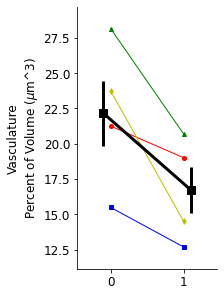

In [9]:
# Density-Result-ch{channel}.csv is created with 'python aicsMaskDen.py'
channel = 2
csvFile = f'../Density-Result-ch{channel}.csv'
superiorList, inferiorList = aicsPlot.plotMaskDensity(channel=channel, csvFile=csvFile, plotMean=True)

# append mean +/- se


In [3]:
# do stats on return from aicsPlot.plotMaskDensity

def getStats(theList):
    theMean = np.nanmean(theList)
    theStd = np.nanstd(theList)
    theN = len(theList)
    theSem = theStd / math.sqrt(theN)
    return theMean, theStd, theN, theSem

# get mean/sd/n from each superior/inferior
sMean, sStd, sSem, sN = getStats(superiorList)
iMean, iStd, iSem, iN = getStats(inferiorList)

# do stats
import scipy
alternative = 'greater' #(“two-sided”, “greater”, “less”)
mode = 'exact'
stat, pValue = scipy.stats.wilcoxon(x=superiorList, y=inferiorList, alternative=alternative, mode=mode)
print('superiorList:', superiorList)
print('inferiorList:', inferiorList)
print('wilcoxon pValue:', pValue)

stat, pValue = scipy.stats.ttest_rel(superiorList, inferiorList)
print('paired ttest pValue:', pValue)


superiorList: [21.256964273856166, 28.156973512878338, 15.486733644986794, 23.74271958963223]
inferiorList: [19.008780131482833, 20.692985659913113, 12.68582314087842, 14.501648906458128]
wilcoxon pValue: 0.0625
paired ttest pValue: 0.0511374924790585


SAN1 [3.1887543201446533, 4.77637243270874]
SAN2 [3.997901201248169, 5.162961483001709]
SAN3 [3.519838571548462, 14.416007995605467]
SAN4 [2.9448969364166264, 13.07952880859375]


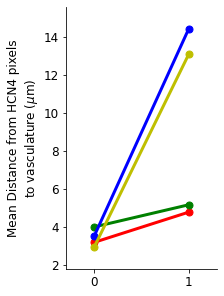

SAN1 [2.617922306060791, 3.935267448425293]
SAN2 [2.7070512771606445, 4.318610191345215]
SAN3 [3.003514528274536, 8.01746940612793]
SAN4 [2.6774215698242188, 4.971847057342528]


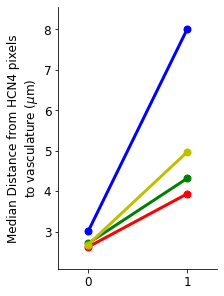

In [4]:
# this requires a file
#os.path.isfile('saNode/hcn4-Distance-Result.csv')

superiorList, inferiorList = aicsPlot.plotMeanDist(csvFile='../hcn4-Distance-Result.csv', statCol='mean')
superiorList, inferiorList = aicsPlot.plotMeanDist(csvFile='../hcn4-Distance-Result.csv', statCol='median')

In [5]:
# do stats on return from aicsPlot.plotMaskDensity

def getStats(theList):
    theMean = np.nanmean(theList)
    theStd = np.nanstd(theList)
    theN = len(theList)
    theSem = theStd / math.sqrt(theN)
    return theMean, theStd, theN, theSem

# get mean/sd/n from each superior/inferior
sMean, sStd, sSem, sN = getStats(superiorList)
iMean, iStd, iSem, iN = getStats(inferiorList)

print('superiorList:', superiorList)
print('inferiorList:', inferiorList)

# do stats
import scipy
alternative = 'less' #(“two-sided”, “greater”, “less”)
mode = 'exact'
stat, pValue = scipy.stats.wilcoxon(x=superiorList, y=inferiorList, alternative=alternative, mode=mode)
print('wilcoxon pValue:', pValue)

stat, pValue = scipy.stats.ttest_rel(superiorList, inferiorList)
print('paired ttest pValue:', pValue)


superiorList: [2.617922306060791, 2.7070512771606445, 3.003514528274536, 2.6774215698242188]
inferiorList: [3.935267448425293, 4.318610191345215, 8.01746940612793, 4.971847057342528]
wilcoxon pValue: 0.0625
paired ttest pValue: 0.056111683096255104
